In [19]:
import time
import numpy as np
import pickle
import matplotlib
from matplotlib import pyplot as plt
from sklearn import metrics

In [12]:
import os
train_r = pickle.load(open("train_r.pkl", "rb"))
train_b = pickle.load(open("train_b.pkl", "rb"))
valid_r = pickle.load(open("test_r.pkl", "rb"))
valid_b = pickle.load(open("test_b.pkl", "rb"))

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
#concatenate everythin appropriately to have the final datasets
one_label = np.ones(len(train_r))
zeros_label = np.zeros(len(train_b))
one_test = np.ones(len(valid_r))
zero_test = np.zeros(len(valid_b))

trainX = np.concatenate((train_r, train_b))
trainY = np.concatenate((one_label, zeros_label))
validX = np.concatenate((valid_r, valid_b))
validY  = np.concatenate((one_test, zero_test))

In [16]:
#gerenate feature vectors 
total_words = {}
for line in trainX:
    words = line.split(" ")
    for word in words:
        if word == "":
            continue
        try:
            total_words[word]
        except:
            total_words[word] = True

print(len(total_words.keys()))
#dont add words in valid and test sets

4818


In [17]:
#create training feats

#print(len(validX))
unique_keys = list(total_words.keys())
unique_keys.sort()
#print(unique_keys[:10])
#account for a bias
train_feats = np.zeros((len(trainX), len(total_words.keys()) ))
for i, line in enumerate(trainX):
    words = line.split(" ")
    #print(words)
    for word in words:
        if word =="":
            continue
        #print(unique_keys.index(word))
        ind = unique_keys.index(word)  
        #plus one is so that the very first is the bias (here a bias of zero)
        train_feats[i][ind] = 1


#create testing features
valid_feats = np.zeros((len(validX), len(total_words.keys())))
for i , line in enumerate(validX):
    words = line.split(" ")
    #print(len(words), end = " ")
    #if i ==0:
        #print(words)
    #print(words)
    for word in words:
        if word =="":
            continue
        #account for value error:
        try:
            ind = unique_keys.index(word) 
            #print(ind)
            valid_feats[i][ind] = 1
        except:
            continue       
#inds = np.where(valid_feats ==1)[1]
#print("\n", inds[:34])

In [37]:
tree_mod = DecisionTreeClassifier(criterion="gini", 
          max_depth=2, random_state=0 ,min_samples_split = 2)
#got rid of class weight param from balanced to none
#tested entropy vs gini scotes
#test_min num of leaves left, prevents over fitting, prunes very ends

In [38]:
depths = [1, 2, 4, 5, 10, 15, 20, 25, 50, 100, 500, 1000]

for val in depths:
    tree_mod.max_depth = val
    tree_mod.fit(train_feats, trainY)
    preds = tree_mod.predict(valid_feats)
    print(metrics.accuracy_score(validY, preds))
# a split of 100 seems to give the best results by far

0.661914460285
0.670061099796
0.688391038697
0.680244399185
0.727087576375
0.727087576375
0.733197556008
0.718940936864
0.723014256619
0.741344195519
0.737270875764
0.737270875764


In [62]:
tree_mod = DecisionTreeClassifier(criterion="gini", 
          max_depth=3, random_state=0 ,min_samples_split = 2)
tree_mod.fit(train_feats, trainY)
preds = tree_mod.predict(valid_feats)
print(metrics.accuracy_score(validY, preds))

0.688391038697


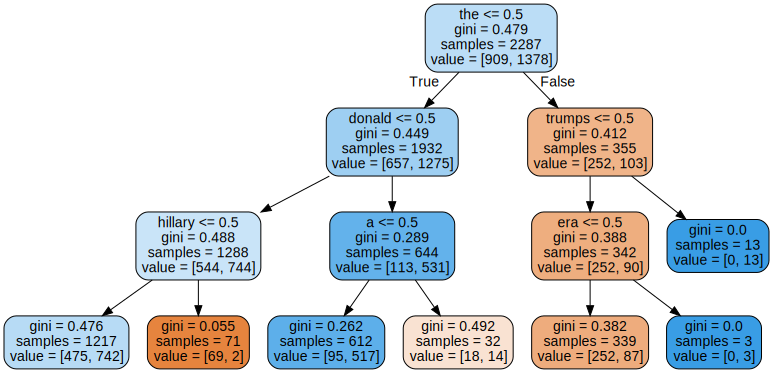

In [63]:
from sklearn import tree
import pydot
from io import StringIO
import graphviz
#dotfile = StringIO()

#plot the first three layers, so we can see hwat its splitting on the second layer
tree.export_graphviz(tree_mod, out_file = "tree.dot", label ="all", filled = True, rounded = True, feature_names=unique_keys)
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)
#pydot.graph_from_dot_data(dotfile.getvalue()).write_png("dtree2.png")